Import Essential Libraries

In [0]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import statistics
import matplotlib.pyplot as plt

#Global Histogram Equalization

In [0]:
img = cv2.imread('esn.tif',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)


True

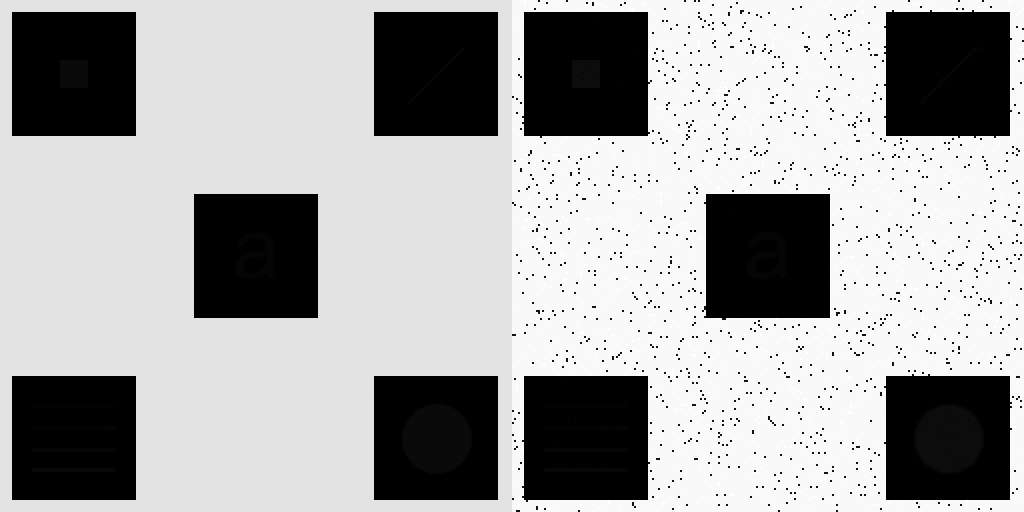

In [0]:
cv2_imshow(res)

#Local Histogram Equalization

In [0]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('lhe.jpg',cl1)


True

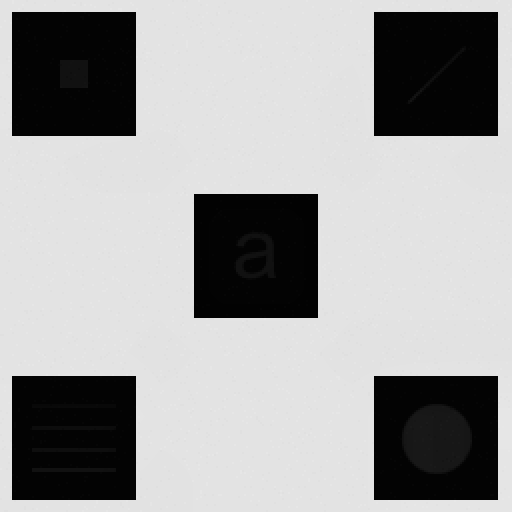

In [0]:
cv2_imshow(cl1)

In [0]:
def guassian(img, m):
  blur = cv2.GaussianBlur(img,(m,m),0)
  return blur


In [0]:
img2 = cv2.imread('fig2.tif')

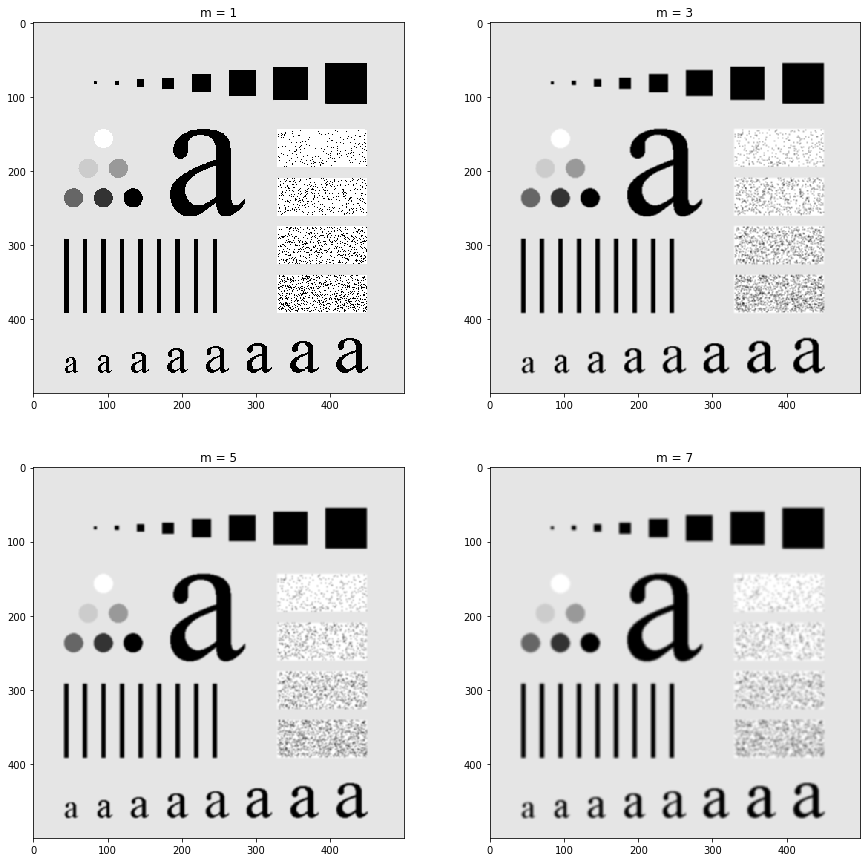

In [0]:
fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221)
ax1.imshow(img2)
ax2 = fig.add_subplot(222)
ax2.imshow(guassian(img2,3))
ax3 = fig.add_subplot(223)
ax3.imshow(guassian(img2,5))
ax4 = fig.add_subplot(224)
ax4.imshow(guassian(img2,7))
ax1.title.set_text('m = 1')
ax2.title.set_text('m = 3')
ax3.title.set_text('m = 5')
ax4.title.set_text('m = 7')
plt.show()

In [0]:
def apply_filter(timg, matrix):
  img1 = np.zeros((timg.shape[0]+2,timg.shape[1]+2))
  mv = [-1,0,1]
  for i in range(1,timg.shape[0]+1):
    for j in range(1,timg.shape[1]+1):
      img1[i][j] = timg[i-1][j-1]
  for i in range(1,timg.shape[0]+1):
    for j in range(1,timg.shape[1]+1):
      ans = 0
      for k1 in range(3):
        for k2 in range(3):
          ans += (img1[i + mv[k1]][j + mv[k2]] *  matrix[k1][k2])
      timg[i-1][j-1] = ans
  return timg


In [0]:
img5 = cv2.imread('fig3.tif')

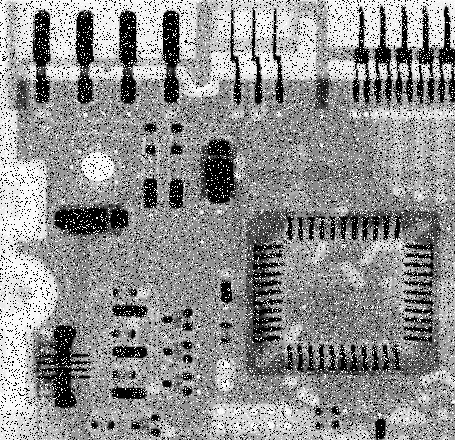

In [0]:
cv2_imshow(img5)

In [0]:
def grayscale(timg):
  grey_img = np.empty([timg.shape[0], timg.shape[1]])
  for i in range(timg.shape[0]):
    for j in range(timg.shape[1]):
      grey_img[i][j] = sum(timg[i][j])/3
  return grey_img

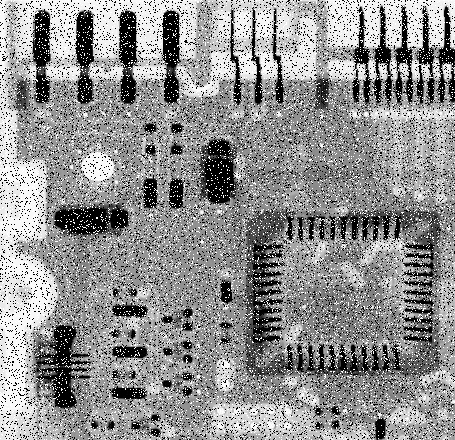

In [0]:
img6 = grayscale(img5)
cv2_imshow(img6)

#Mean Filter for Blurring

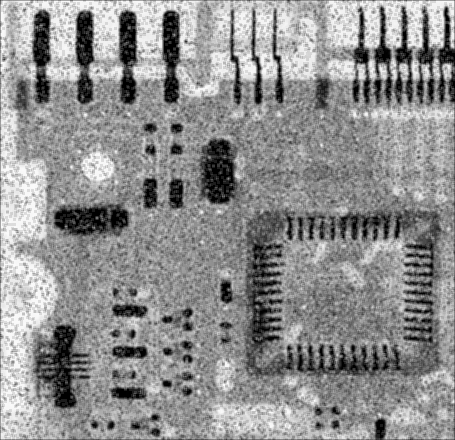

In [0]:
avg_filter = np.full((3,3), 1/9)
cv2_imshow( apply_filter(img6, avg_filter))

In [0]:
def apply_median_filter(timg):
  img1 = np.zeros((timg.shape[0]+2,timg.shape[1]+2))
  mv = [-1,0,1]
  for i in range(1,timg.shape[0]+1):
    for j in range(1,timg.shape[1]+1):
      img1[i][j] = timg[i-1][j-1]
  for i in range(1,timg.shape[0]+1):
    for j in range(1,timg.shape[1]+1):
      ans = []
      for k1 in range(3):
        for k2 in range(3):
          ans.append(img1[i + mv[k1]][j + mv[k2]])
      timg[i-1][j-1] = statistics.median(ans)
  return timg


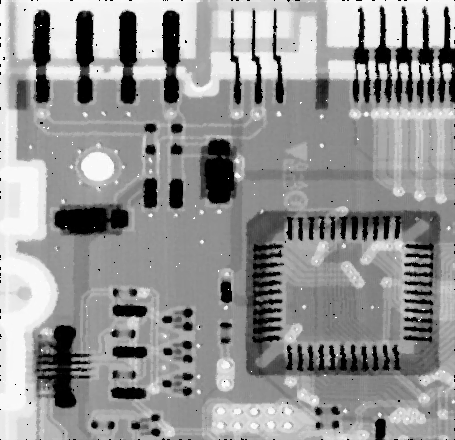

In [0]:
cv2_imshow( apply_median_filter(grayscale(img5)))

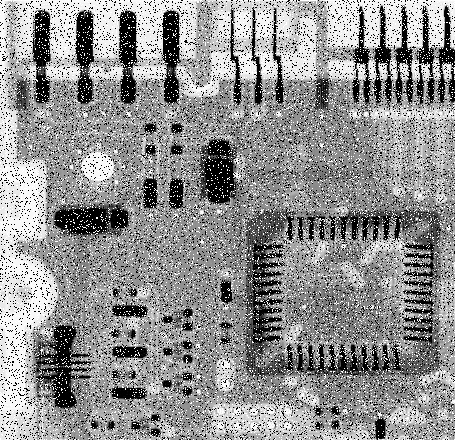

In [0]:
cv2_imshow(2*grayscale(img5) - apply_median_filter(grayscale(img5)))

In [0]:
def horizontal_add(img, img2):
  return np.concatenate((img, img2), axis=1)

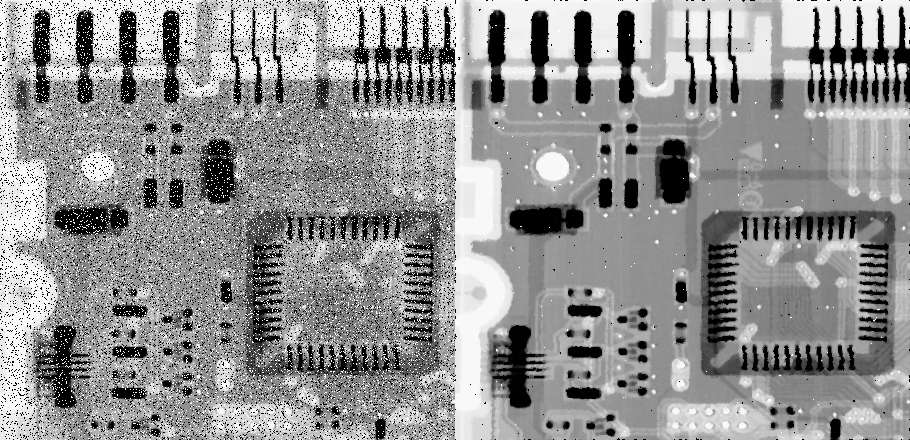

In [0]:
cv2_imshow(horizontal_add(grayscale(img5), apply_median_filter(grayscale(img5))))

#Sharpening of Images

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


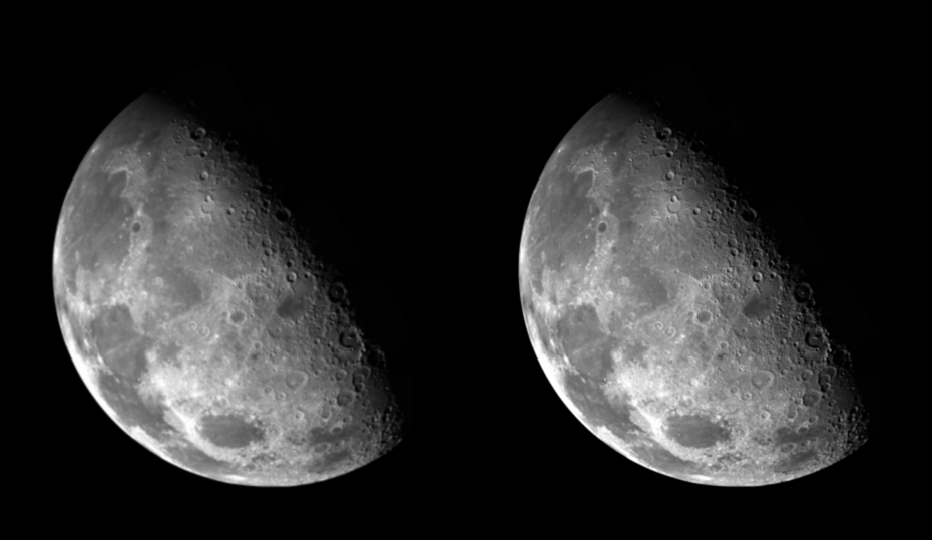

In [0]:
# L_4 laplacian filter
kernel1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
# L_8 laplacian filter
kernel2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# Guassian Filter
kernel4 = np.array([[1,2,1], [2,4,2], [1,2,1]])
kernel4 = np.divide(kernel4,16)
print(kernel4)
moon = cv2.imread('fig4.tif')
# cv2_imshow(horizontal_add(grayscale(moon), apply_filter(grayscale(moon), kernel1)))
# cv2_imshow(horizontal_add(grayscale(moon), apply_filter(grayscale(moon), kernel2)))
cv2_imshow(horizontal_add(grayscale(moon), 2*grayscale(moon) - apply_filter(grayscale(moon), kernel4)))


#Sharpening of Image with HyperBoosting

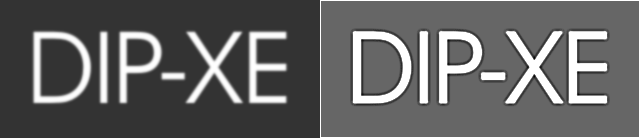

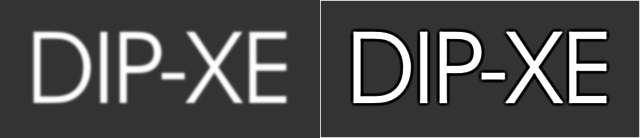

In [0]:
kernel3 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

dip = cv2.imread('fig5.tif')
cv2_imshow(horizontal_add(grayscale(dip), grayscale(dip) + apply_filter(grayscale(dip),kernel3)))
cv2_imshow(horizontal_add(grayscale(dip), apply_filter(grayscale(dip),kernel3)))